# Template Notebook for Displaying $\gamma p \rightarrow K^0 \Sigma^+$  MCMC Information

In [1]:
# Standard imports and setup...

# Numpy handles numerical manipulations efficiently...
import numpy as np

# Matplotlib is the standard python plotting library...
%matplotlib inline
import matplotlib.pyplot as plt

# Seaborn is a layer on top of Matplotlib...
import seaborn as sns

# Pandas is the python framework for handling datasets...
import pandas as pd

## Read in Data
Let's get the data imported, and take a quick look at the stats...

In [2]:
# Definition of columns as given by Louise...
csv_labels = ['a1Re','a1Im','a2Re','a2Im','a3Re','a3Im','a4Re','a4Im','B','Ox','Oz','R','T']
amp_labels = ['a1Re','a1Im','a2Re','a2Im','a3Re','a3Im','a4Re','a4Im']
obs_labels = ['B','Ox','Oz','R','T']
# Read file into a DataFrame...
louise_df = pd.read_csv('/home/louise/g8K0Sig/code/MCMCamp2/out4/costhK0CMS0.67_Egamma1.85_/MCMCTreeAmp.csv', names=csv_labels)
# Print first few rows as a check...
df_amp = louise_df[amp_labels]
df_obs = louise_df[obs_labels]
print(df_amp.head())
print(df_obs.head())

       a1Re      a1Im      a2Re      a2Im      a3Re      a3Im      a4Re  \
0  0.349387  0.903341 -0.292643  0.541492 -0.226358 -0.352698 -0.324039   
1  0.349387  0.903341 -0.193082  0.541492 -0.226358 -0.352698 -0.324039   
2  0.349387  0.903341  0.181057  0.541492 -0.226358 -0.352698 -0.324039   
3  0.349387  0.903341  0.181057  0.541492 -0.226358  0.074227 -0.324039   
4  0.349387  0.903341  0.181057  0.541492 -0.226358  0.074227 -0.324039   

       a4Im  
0  0.378164  
1  0.378164  
2  0.378164  
3  0.378164  
4  0.516480  
          B        Ox        Oz         R         T
0  0.677099  0.157134 -0.301759  0.369030  0.478746
1  0.649531  0.124714 -0.360028  0.411441  0.522714
2  0.646933 -0.005499 -0.563656  0.415452  0.526873
3  0.765914  0.363430 -0.461197  0.335990  0.641388
4  0.642270  0.541972 -0.518308  0.228360  0.712612


In [3]:
# Quick and dirty summary of stats...
print(df_amp.describe())
print(df_obs.describe())


                a1Re           a1Im           a2Re           a2Im  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       -0.010740       0.027240       0.022678       0.030187   
std         0.690151       0.683969       0.504261       0.527447   
min        -0.999608      -0.999689      -0.999525      -0.999074   
25%        -0.706845      -0.665871      -0.427053      -0.427519   
50%        -0.013323       0.082206       0.041848       0.048992   
75%         0.682510       0.702618       0.469395       0.502071   
max         0.999987       0.999987       0.996514       0.998926   

                a3Re           a3Im           a4Re           a4Im  
count  200000.000000  200000.000000  200000.000000  200000.000000  
mean       -0.023664       0.013411      -0.055826       0.018104  
std         0.397425       0.408239       0.487228       0.471292  
min        -0.999453      -0.992991      -0.996771      -0.999665  
25%        -0.337013      -0.311794   

## Distributions

### Time Series
First plot MCMC chains, assuming that the tree orders rows by time step...

<Figure size 432x288 with 0 Axes>

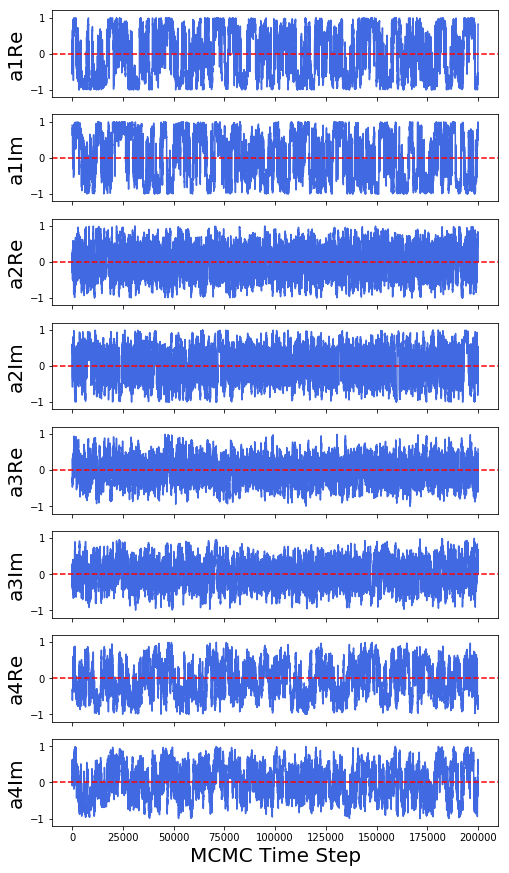

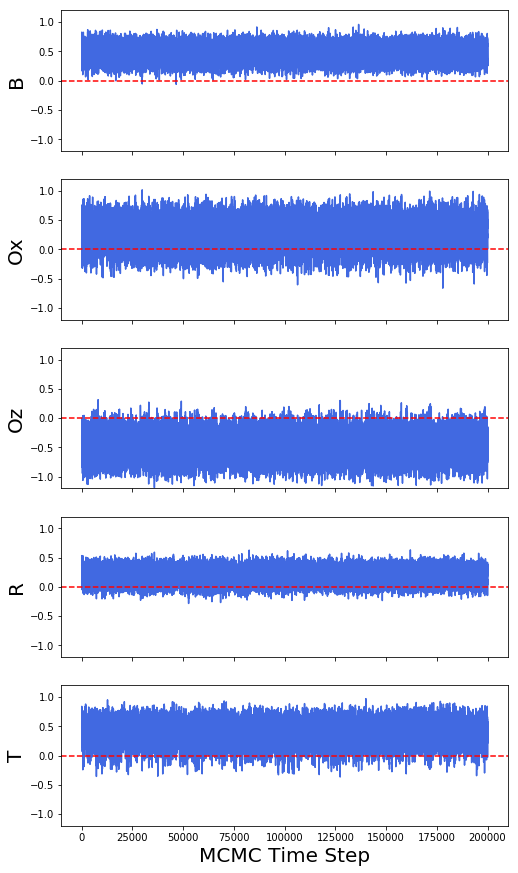

In [4]:
# clear current figure...
plt.clf()

# amps
n_obs = len(amp_labels)

# set up figure with appropriate mcmc timelines...
# Play around with figsize arguments as desired
fig, axes = plt.subplots(n_obs, 1, sharex=True, figsize=(8, 15))

for i in range(n_obs):
    axes[i].plot(df_amp[amp_labels[i]], color="royalblue")
    axes[i].set_ylabel(amp_labels[i], fontsize=20)
    axes[i].set_ylim(-1.2,1.2)
    axes[i].axhline(0.0, color="red", linestyle='--')


axes[n_obs-1].set_xlabel("MCMC Time Step", fontsize=20)

#fig.tight_layout(h_pad=0.0)

# obs
n_obs = len(obs_labels)

# set up figure with appropriate mcmc timelines...
# Play around with figsize arguments as desired
fig, axes = plt.subplots(n_obs, 1, sharex=True, figsize=(8, 15))

for i in range(n_obs):
    axes[i].plot(df_obs[obs_labels[i]], color="royalblue")
    axes[i].set_ylabel(obs_labels[i], fontsize=20)
    axes[i].set_ylim(-1.2,1.2)
    axes[i].axhline(0.0, color="red", linestyle='--')


axes[n_obs-1].set_xlabel("MCMC Time Step", fontsize=20)

#fig.tight_layout(h_pad=0.0)

# To save plot as a figure, uncomment...
# plt.savefig('name_of_plot.pdf', bbox_inches = 'tight')

# Draw plot in notebook...
plt.show()

### Corner Plot

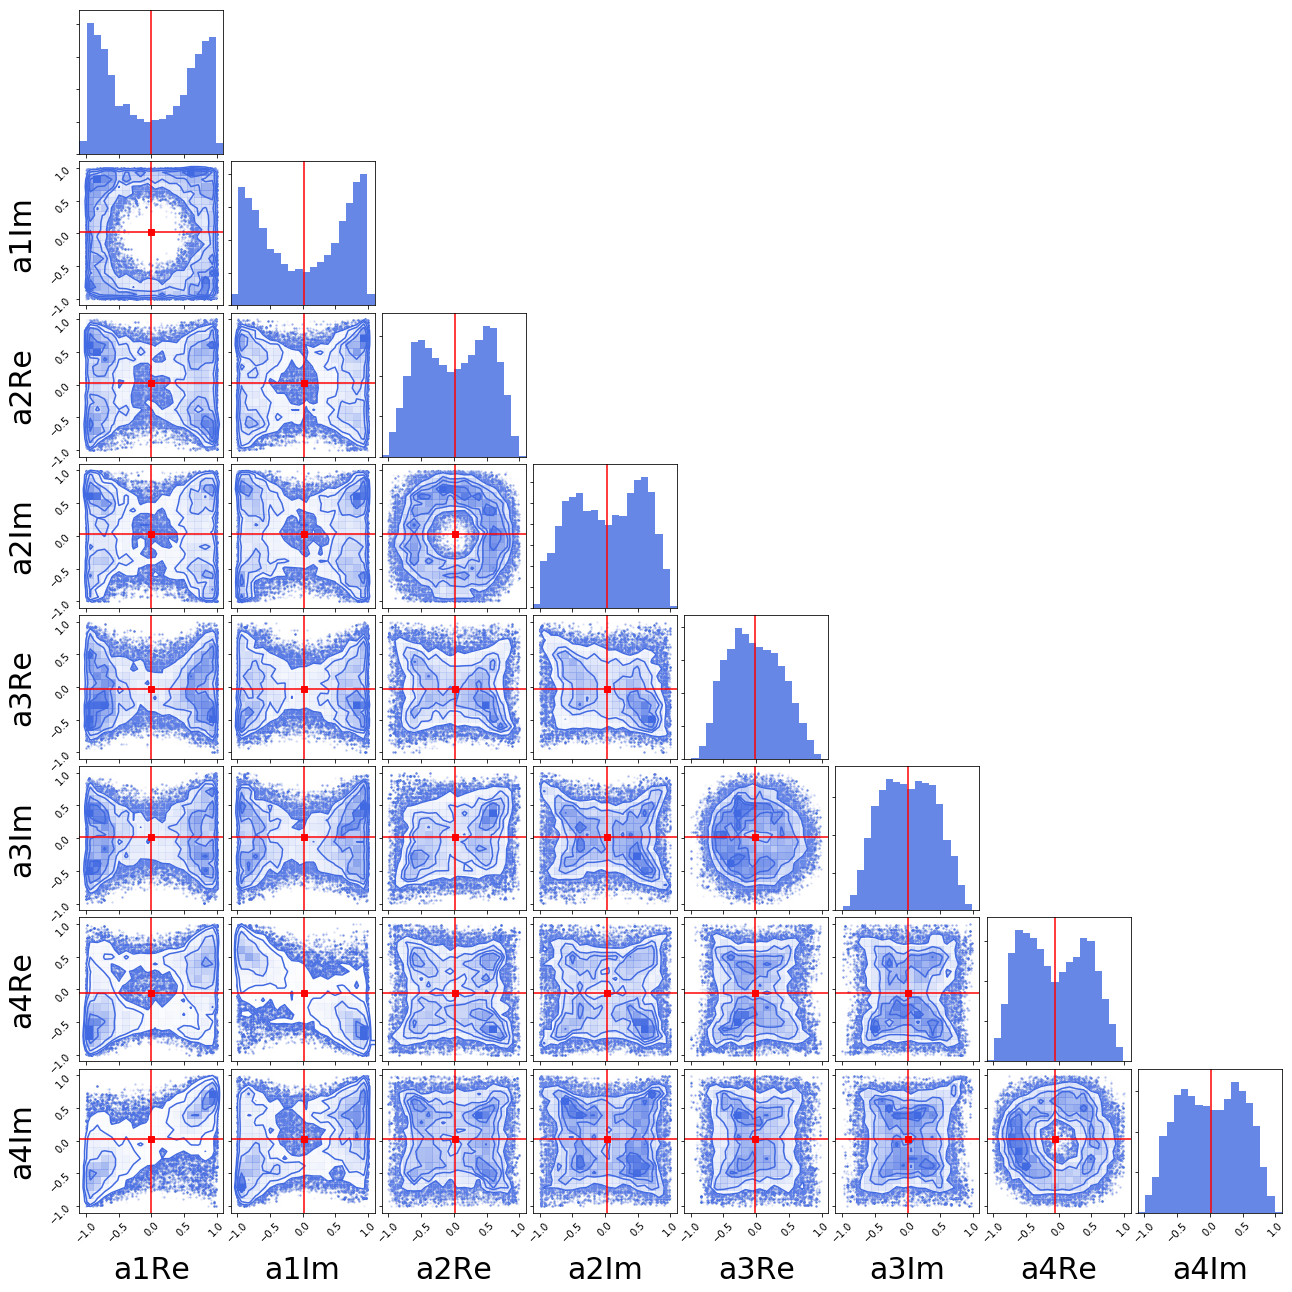

In [5]:
# Nice package to display multi-dimensional PDFs.
# https://corner.readthedocs.io/en/latest/index.html for API
import corner 

fig = corner.corner(df_amp,
                    color='royalblue', 
                    range=[(-1.1,1.1),(-1.1,1.1),(-1.1,1.1),(-1.1,1.1),(-1.1,1.1),(-1.1,1.1),(-1.1,1.1),(-1.1,1.1)],
                    truths=df_amp.mean().values, truth_color='red',
                    label_kwargs={'fontsize':30, 'labelpad':20},
                    hist_kwargs = {'histtype':'stepfilled','alpha':0.8})

plt.show()

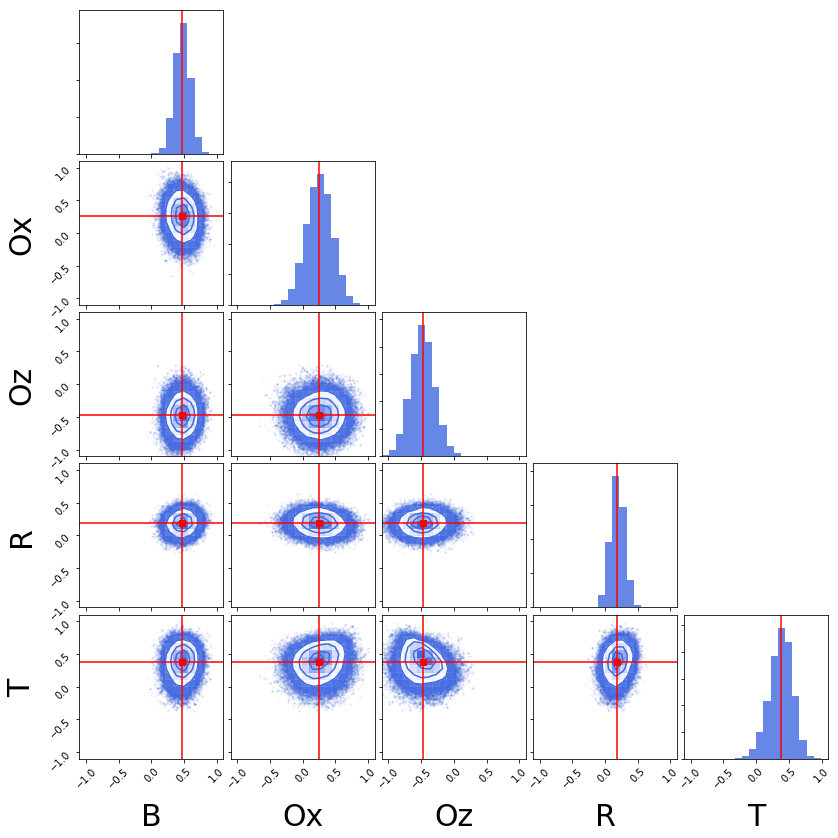

In [6]:
fig = corner.corner(df_obs,
                    color='royalblue', 
                    range=[(-1.1,1.1),(-1.1,1.1),(-1.1,1.1),(-1.1,1.1),(-1.1,1.1)],
                    truths=df_obs.mean().values, truth_color='red',
                    label_kwargs={'fontsize':30, 'labelpad':20},
                    hist_kwargs = {'histtype':'stepfilled','alpha':0.8})

plt.show()

## Seaborn Possibilities

### "Violin" Plot

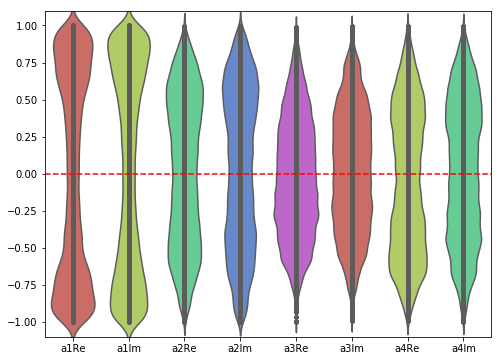

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Use cubehelix to get a custom sequential palette
pal = sns.color_palette("hls", n_obs)

# Show each distribution with both violins and points
sns.violinplot(data=df_amp, palette=pal, inner="points")

ax.set_ylim(-1.1,1.1)
ax.axhline(0.0,color='red',linestyle='--')

plt.show()

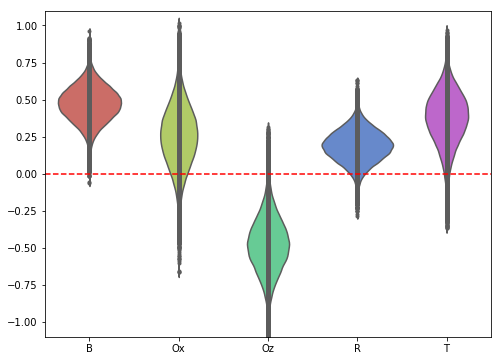

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Use cubehelix to get a custom sequential palette
pal = sns.color_palette("hls", n_obs)

# Show each distribution with both violins and points
sns.violinplot(data=df_obs, palette=pal, inner="points")

ax.set_ylim(-1.1,1.1)
ax.axhline(0.0,color='red',linestyle='--')

plt.show()

### Box Plot

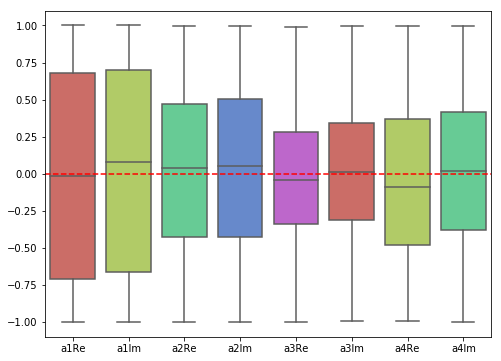

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Use cubehelix to get a custom sequential palette
pal = sns.color_palette("hls", n_obs)

# Show each distribution with both violins and points
sns.boxplot(data=df_amp, palette=pal)

ax.set_ylim(-1.1,1.1)
ax.axhline(0.0,color='red',linestyle='--')

plt.show()

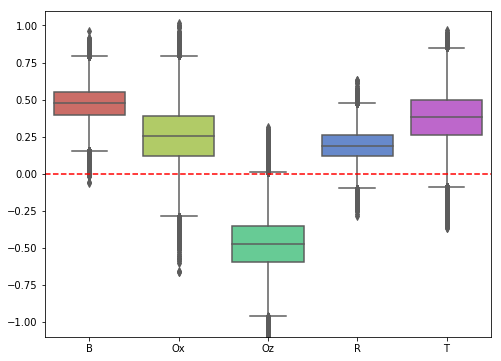

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Use cubehelix to get a custom sequential palette
pal = sns.color_palette("hls", n_obs)

# Show each distribution with both violins and points
sns.boxplot(data=df_obs, palette=pal)

ax.set_ylim(-1.1,1.1)
ax.axhline(0.0,color='red',linestyle='--')

plt.show()

### Boxenplot

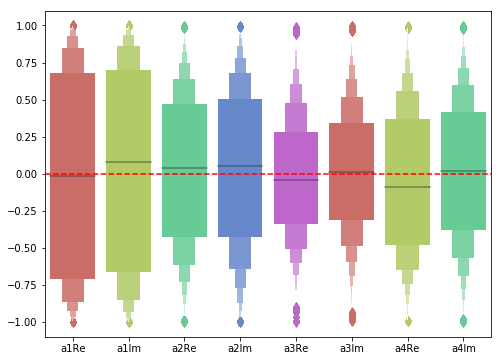

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Use cubehelix to get a custom sequential palette
pal = sns.color_palette("hls", n_obs)

# Show each distribution with both violins and points
sns.boxenplot(data=df_amp, palette=pal)

ax.set_ylim(-1.1,1.1)
ax.axhline(0.0,color='red',linestyle='--')

plt.show()

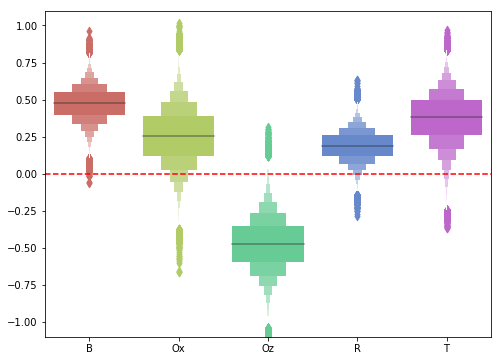

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Use cubehelix to get a custom sequential palette
pal = sns.color_palette("hls", n_obs)

# Show each distribution with both violins and points
sns.boxenplot(data=df_obs, palette=pal)

ax.set_ylim(-1.1,1.1)
ax.axhline(0.0,color='red',linestyle='--')

plt.show()

Enjoy...